In [1]:
from qiskit import QuantumCircuit, execute
from qiskit import IBMQ, Aer
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel
import matplotlib.pyplot as plt
import numpy as np

provider = IBMQ.load_account()

/miniconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


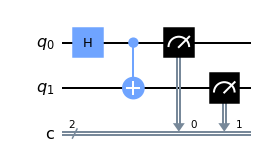

In [2]:
# Make a circuit
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])
qc.draw(output='mpl')

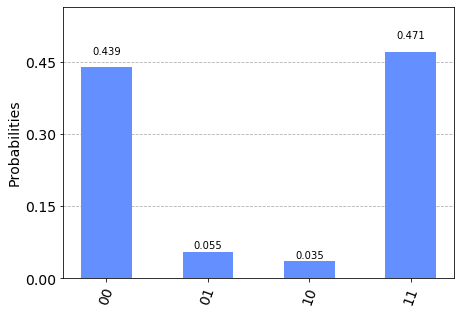

In [7]:
def noisy_simulation(back_end):
    # Build noise model from backend properties
    backend = provider.get_backend(back_end)
    noise_model = NoiseModel.from_backend(backend)

    # Get coupling map from backend
    coupling_map = backend.configuration().coupling_map

    # Get basis gates from noise model
    basis_gates = noise_model.basis_gates

    # Perform a noise simulation
    result = execute(qc, Aer.get_backend('qasm_simulator'),
                     coupling_map=coupling_map,
                     basis_gates=basis_gates,
                     noise_model=noise_model).result()
    counts = result.get_counts(0)
    return counts

counts = noisy_simulation('ibmq_vigo')
plot_histogram(counts)

In [5]:
backends = ['expected', 
            'ibmq_santiago', 'ibmq_athens', 'ibmq_valencia', 'ibmq_vigo', 'ibmq_16_melbourne', 'ibmq_ourense']

y = np.zeros([4, len(backends)])
y[:,0] = [512, 0, 0, 512]    # expected counts

for i in range(1, len(backends)):
    counts = noisy_simulation(backends[i])
    y[:,i] = [item[1] for item in counts.items()]

y = y/1024    # convert to probabilities

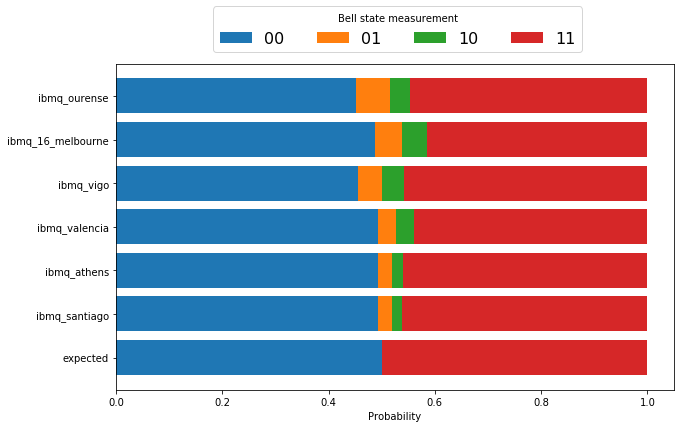

In [6]:
x = np.arange(0, len(backends))
labels = ['00', '01', '10', '11']

plt.figure(figsize=(10, 6))
for i in range(4):
    plt.barh(x, y[i], left=np.sum(y[:i],0), label=labels[i])

plt.yticks(x, backends)
plt.xlabel('Probability')
plt.legend(ncol=4, prop={'size': 16}, bbox_to_anchor=(0.85, 1.2), title='Bell state measurement');